# Milestone 2 - Group 1041 *(Matthew Currie, Jivraj , Livia Jonnatan)*
## Medical Cost Database Research Questions

<!-- These are coming from the README.md file we have in the main directory -->
1. Does medical cost increase with age?
2. Does having children increase one's medical costs?
3. Do men face higher medical costs than women?
4. Do men with High BMI's face higher medical costs than women with High BMI's?
5. Do medical costs vary with region and sex?
6. How does being a smoker affect your medical costs?


In [1]:
import sys
sys.path.append("../scripts")
from project_functions import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "../../data/raw/Medical_Cost.csv"

In [16]:
# First Load our data
df = load_data(
    PATH
)


### Research Question 1: Does a higher age correlate with higher medical costs?

Firstly we will compare age and charge on a scatter plot.

<AxesSubplot:xlabel='age', ylabel='charges'>

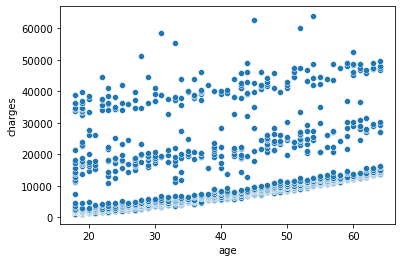

In [55]:
sns.scatterplot(data=df, x='age', y='charges')

From this scatterplot we can gather that the realtion between age and cost is almost linear in a sense that as the age of a person rises, the more they will have to pay for their medical expenses. Also, we can make a distinction that there are many outliers in all of the ages but we can clarify that a greater age will result in higher costs. That can be shown through a barplot with the age category column to show the difference in each age group, which is below.

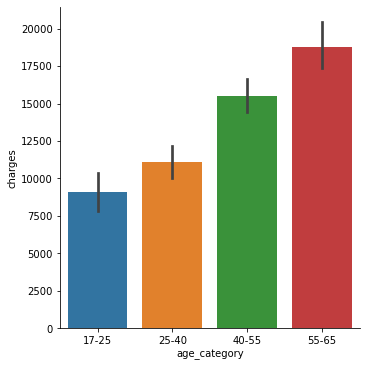

In [56]:
sns.catplot(x='age_category', y='charges', kind='bar', data=df)

As we can see this assumption that a greater age will result in them paying more in medical expences is true. Also, we can confirm that the relationship is linear in way that lower ages spend less that higher ages which will result in a line that has a postive slope. This barplot showcases the incrementation through the age groups. 

In addition, we can also explore how smoking in the different age groups will affect thier medical charges.

<AxesSubplot:xlabel='age', ylabel='charges'>

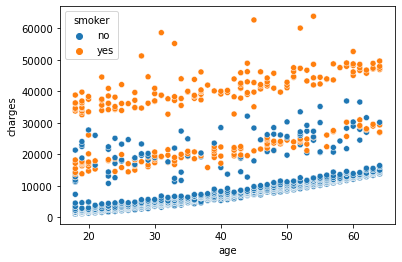

In [57]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

Firstly, from this scatter plot we can gather that agian when ages go up the person will have to pay more in medical expenses. But, the catch is that if that person is a smoker in their respective age group they will have to pay more than the ages that do not smoke. This can be seen clearer on a barplot, which is below.

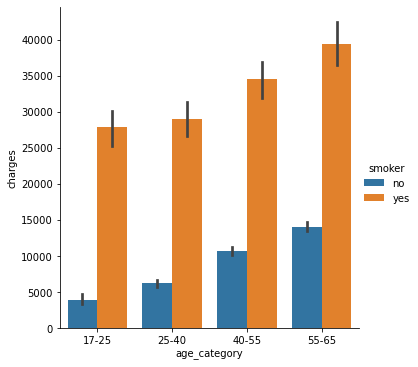

In [58]:
sns.catplot(data=df, x='age_category', y='charges', hue='smoker', kind='bar')

This barplot shows that regardless of the persons age they will have to pay more in medical than those who do not smoke. This makes sense since smoking is not healthy and will degrade the persons health as time goes on. We can also see that the barplot shows for both smoker and non smoker a linear relationship in that the lower ages will pay less than those who are 55-65.    

### Research Question 2: Does having children increase one's medical costs?

Firstly, we apply a pointplot to see who pays more, the male with kids or the female with kids.

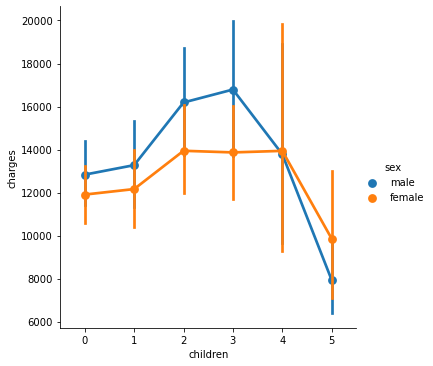

In [59]:
sns.catplot(x="children", y="charges", hue="sex", kind="point", data=df)

From this pointplot we can gather that females with 0-4 children pay less than a man with 0-4 kids. Also we can gather that men with 3 kids pay the most in medical charges, while a female with 3 children pays less than the man. Plus, a key observation would be that after 3-4 children the line dips way down which means a male and a female with 5 children will pay less than a female or male with 0-4 children. We can also group the children into families with different age groups, which is shown below in a barplot. 

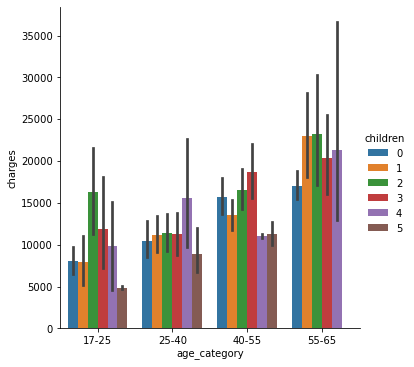

In [60]:
sns.catplot(x="age_category", y="charges", hue="children", kind="bar", data=df)

From this barplot we can see as age progresses with those families having at least 0-3 kids, they will have to pay more. Also, we can say that as the family grows older they also have to pay more in medical bills with having 0 to 5 children. 

We can also look into smokers/non smokers with kids with a barplot. 

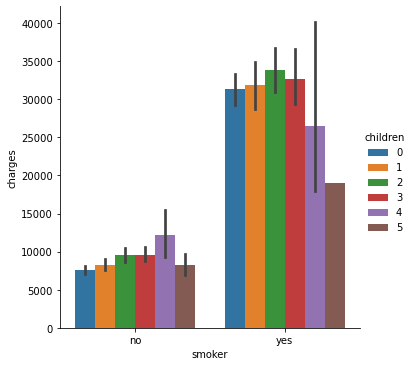

In [54]:
sns.catplot(x="smoker", y="charges", hue="children", kind="bar", data=df)

With this barplot we can see that smokers indeed pay more than non smokers in medical charges. This also shows that smokers with children do pay more than non smokers with children. 

### Research Question 3: Do men face higher medical costs than women?

To begin our analysis, let's see the average medical costs women and men face. This should give us a general view on how medical costs differ between sex.

In [8]:
df.groupby('sex').charges.agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


On average, men have higher medical costs (± 13957) than women (±12570). Even though, it can be seen from the table that women have higher lower and upper bound (± 1608-63770) of medical costs than men (± 1122-62593).

To convince you that it is generally true that men face higher medical costs than women, let's draw a plot.

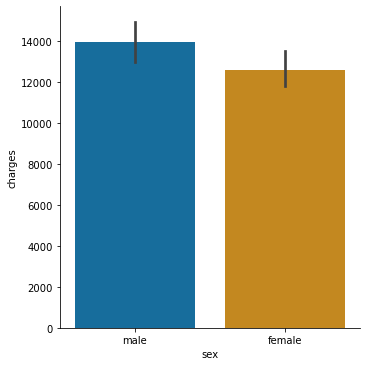

In [9]:
sns.catplot(x='sex', y='charges', kind='bar', data=df, palette='colorblind')

It is clear that overall, the men have higher medical costs than the women. Now, you might ask how is the distribution of the medical costs for men and women? To answer that, let's look at the following plot.

<AxesSubplot:xlabel='sex', ylabel='charges'>

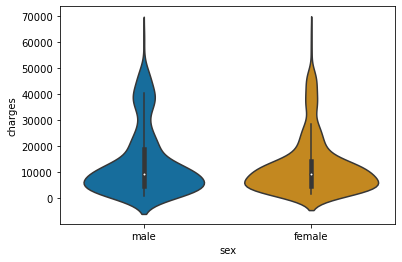

In [10]:
sns.violinplot(x='sex', y='charges', data=df, palette='colorblind')

The violin plot above indicates that men and women have the highest medical costs distribution somewhere below 10000.

Now, let's test what we know from question 1, will sex affect the answer to question 1?

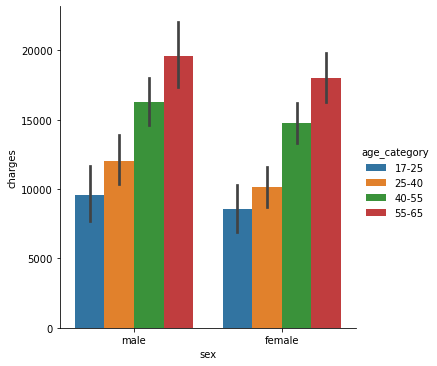

In [12]:
sns.catplot(x='sex', y='charges', hue='age_category', kind='bar', data=df)

It is no surprise! It can be seen that in general seniors women and men (age 55-65) face the highest medical costs and young women and men (age 17-25) face the lowest medical costs. In both sex categories, it is consistent with the answer in the first research question, that the medical costs increase as the age increases, regardless the sex.

Let's go back to our violin plot and see how is the distribution with age.

<AxesSubplot:xlabel='age_category', ylabel='charges'>

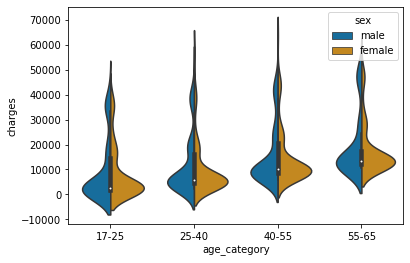

In [13]:
sns.violinplot(x='age_category', y='charges', hue='sex', split=True, data=df, palette='colorblind')

It indicates that generally the distribution is somewhere below 10000. However, for seniors the distribution is above 10000.

### Research Question 4: Do men with High BMI's face higher medical costs than women with High BMI's?

To answer this question, let's categorize the BMI into 4 categories, such as *under* for BMI between 10-18.5, *healthy* for BMI between 18.5-25, *over* for BMI between 25-30, and *obese* for BMI between 30-40.

To give us a crystal clear explanation, let's make a plot.

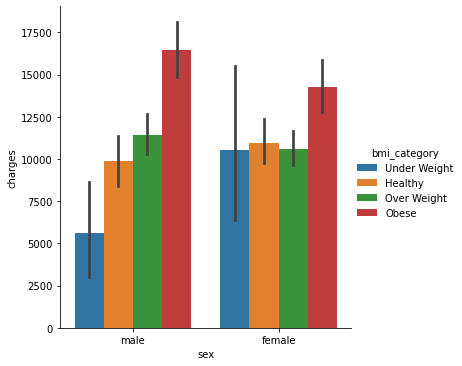

In [14]:
sns.catplot(data=df, x='sex', y='charges', hue='bmi_category', kind='bar')

According to the plot above, it can be seen that for both women and men, those who are categorized as obese, will face the highest medical costs. For women who have BMI ranging from 10-30, they face generally the same amount of medical costs. In contrast, for men, it seems to show a positive relationship between BMI and medical costs. As men's BMI increases, the medical costs increase. That being said, BMI level have effect on men's medical costs, but it does not have effect on women's medical costs. It is surprising, isn't it?

### Research Question 5: Do medical costs vary with region and sex?

This dataset divides the region into 4 regions, which are southeast, northeast, southwest, and northwest. Before we dive deep to answer this question, let's see how the medical costs vary with region.

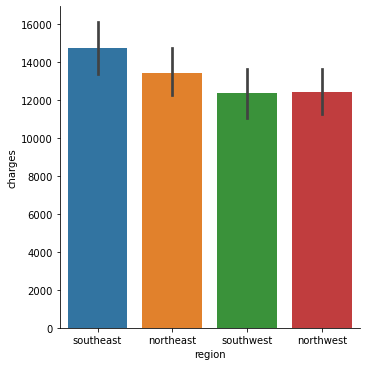

In [8]:
sns.catplot(data=df, x='region', y='charges', kind='bar')

This plot indicates that the southeast region have the highest medical costs, while southwest and northwest region have the lowest medical costs. Thus, it can be seen that the medical costs vary with regions.

Let's test this whether this is true when we break this down based on sex.

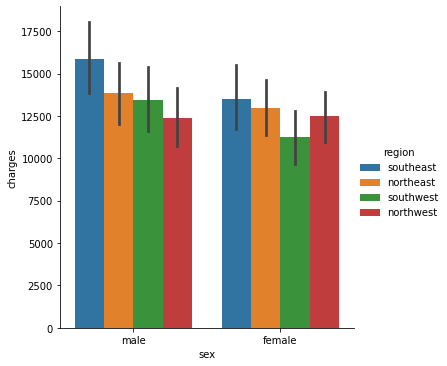

In [11]:
sns.catplot(data=df, x='sex', y='charges', hue='region', kind='bar')

In this second plot, men and women do not show the same trend. In the male category, men in the southeast have the highest medical costs, and men in the northwest have the lowest medical costs. This is somewhat consistent with what we know before. However, there is no noticeable trend for women in a specific region, except that women in the southwest tend to have a slightly lower medical costs than the other 3 regions. Thus, this is inconsistent with what we indicate before. 

Moreover, if we were to sum this two sex categories, it is clear that the southeast has the highest medical costs, and the southwest and northwest have the lowest medical costs.

### Research Question 6: How does being a smoker effect your medical costs?

In this question we explore how smoking will affect the medical expenses of person.

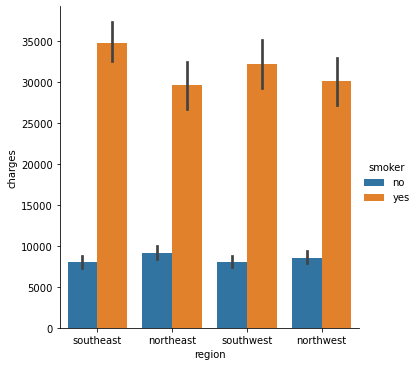

In [5]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df)

This barplot represents smokers and non smokers and comparing which has to pay more in medical expenses in respect of their region. What we can gather from this box plot is that it is very evident that smokers have to pay more in medical fees than non smokers. This makes sense since smoking is not a recommended thing to be doing when trying to be healthy. On the other hand, we can see that there is a slight difference accross the board when it comes to each region. From the barplot we can gather that the southeast have to slightly pay more than other regions who have people that smoke. Also, for non smokers it appears that all the regions pay around the same when it comes to the person being a non smoker.  

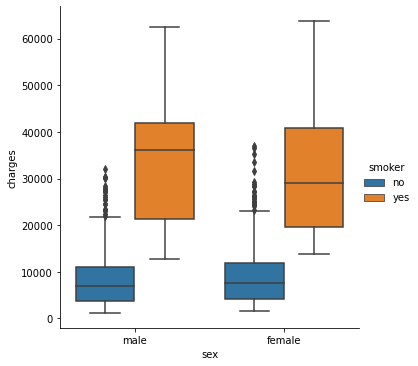

In [35]:
sns.catplot(x="sex", y='charges', hue='smoker', kind='box', data=df)

In this graph we agian look at how smoking will affect your medical expenses but we look at wether there will be a difference in whether the person is a male or female. From this boxplot it is again evident that smokers do have to pay more in expenses compared to people. But, looking at the comparison between male and female it is shown that both male and female smokers pay more than male and female non smokers. Plus, we can see that there little to no difference in how much males and females that smoke have to pay in medical since both boxes max out near the same constraint. That is also true for males and females that do not smoke.    

We can also look into how bmi and smoking will affect the cost of medical with this pointplot.

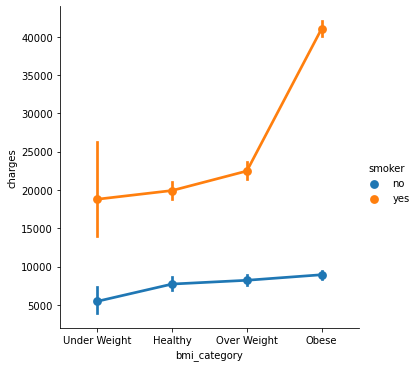

In [51]:
sns.catplot(x="bmi_category", y='charges', hue='smoker', kind='point', data=df)

From this pointplot, we can agian see that the smokers will have to pay more in charges than the non smoker. Also, we can say that if a person is obese and a smoker, they will defintely have to pay more in charges.